In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Definition du problème
Soit $\begin{array}{ccccc}
g & : & (\R^3)^n & \to & R \\
 & & (p_1, ..., p_n) & \mapsto &  \sum_i {\lVert p_{i+1} - R_i\Delta_{i,j}p - p_i\rVert^2} + \gamma \sum_{i,j} {\lVert p_{i} - R_j \Delta_{i,j}p- p_j\rVert^2} \\
\end{array}$
Avec la notation :$$ \forall i \in [1,n], p_i = \begin{pmatrix}
x_i \\[3mm]
y_i \\[3mm]
\theta_i \\
\end{pmatrix}$$
on peut définir la fonction $f$ par:
$\begin{array}{ccccc}
g & : & (\R)^{3n} & \to & R \\
 & & (x_1,...,x_n,y_1,..., y_n, \theta_1,..., \theta_n) & \mapsto &  \sum_i {\lVert p_{i} - R_j \Delta_{i,j}p- p_j\rVert^2} + \gamma \sum_{i,j} {\lVert p_{i} - R_j \Delta_{i,j}p- p_j\rVert^2} \\
\end{array}$
On notera $(e_i)_{i \in [1,3]}$ la base canonique de $\R^3$ et $(b_i)_{i \in [1,3n]}$ celle de $R^{3n}$
Ainsi, en définissant l'isomorphisme $h$ par:
$\begin{array}{ccccc}
h & : & (\R^3)^n & \to &(\R)^{3n} \\
 & & x & \mapsto & \sum_i {\sum_j {(x \cdot e_j) b_{nj + i}}} \\
\end{array}$, c'est à dire l'isomorphisme vérifiant, avec les notations précédentes $$\forall (p_1, ..., p_n) \in (\R^3)^n, h(p_1, ..., p_n) = (x_1,...,x_n,y_1,..., y_n, \theta_1,..., \theta_n) $$, on a ainsi:
$$ g = f \circ h$$
Minimiser g revient donc, à l'isomorphisme h près, à minimiser f.
On s'intéressera par la suite préférentiellement à la fonction f, car la forme de son argument s'inscrit mieux dans le cadre du cours, et on pourra calculer son gradient.




## Contraintes:
Intéressons nous maintenant aux contraintes. 
Les contraintes du problèmes sont :
$$\forall i \in [1,n], \left\{   \begin{array}{ll}
        \theta_i - \frac {pi}{2} <0 \\
        -\theta_i - \frac {pi}{2}<0
    \end{array}
\right.$$
On définit les fonctions $c_{i,k}$ par, avec les notations précédentes,
$$\forall i,k \in [1,n] x [0,1], \forall z \in \R^{3n},  c_{i,k}(z) = (z \cdot b_{2n + i}) - \frac {pi}{2}$$
On peut alors définir le vecteur de fonctions $c$ tel que :
$$c = \begin {pmatrix}
    c_{1,0} \\
    c_{1,1} \\
    ... \\
    c_{n,0} \\
    c_{n,1} 

    \end {pmatrix}$$
Les contraintes se réecrivent donc mathématiquement par : $$c(z) <0$$


On va donc rechercher la solution du problème d'optimisation sous contraintes:
$$\left\{
 \begin {array}{ll}
 \min_{z \in R^{3n}} \\
 c(z) < 0
 \end {array}
 \right.$$

## Etude de la convexité des fonctions:
On va étudier d'abord la fonction $f$.
On définit:
$$\forall i,z \in [1,n] * \R^{3n}, 
\begin{array}{ccccc}
k_j & : & (\R^3) & \to & R \\
 & & (x_i, y_i,\theta_i) & \mapsto &  \lVert p_{i} -\R_j \Delta_{i,j}p -  p_j\rVert\\^2
\end{array} $$
et
 $$\forall i,z \in [1,n] * \R^{3n}, 
\begin{array}{ccccc}
l_j & : & (\R^3) & \to & R \\
 & & (x_i,y_i,\theta_i) & \mapsto &  \lVert p_{j} -\R_i \Delta_{i,j}p -  p_i\\^2 
\end{array} $$
Alors, en tant que composée de fonctions usuelles, $k_i$ et $l_i$ sont différentiables infiniment partout.
De plus, en mettant cette fonction sous la forme d'un produit scalaire, on s'aperçoit que, partout où elle est définie.
$$\frac {\partial k_j}{\partial x_i} =2p_i-(2R_i\Delta_{i,j}p+p_j) \cdot e_1$$ 
$$\frac {\partial k_j}{\partial y_i} =2p_i-(2R_i\Delta_{i,j}p+p_j) \cdot e_2  $$
$$\frac {\partial k_j}{\partial \theta_i} =2p_i-(2R_i\Delta_{i,j}p+p_j) \cdot e_3 $$
Et, comme $B_j$ ne dépend que de $\theta_j$ par construction:
$$\frac {\partial l_j}{\partial x_i} =2p_i+ 2R_i\Delta_{i,j}p-p_j \cdot e_1 $$
$$\frac {\partial l_j}{\partial y_i} =2p_i+2R_i\Delta_{i,j}p+p_j \cdot e_2 $$
$$\frac {\partial l_j}{\partial \theta_i}  = 2 p_i \cdot e_3 +  \frac {\partial p_i^t}{\partial \theta_i}(p_j - R_i\Delta_{i,j}p + p_i^t\frac {\partial p_j - R_i\Delta_{i,j}p }{\partial \theta_i} ) $$
D'ou, en notant $$\dot B = \frac {\partial R_i}{\partial \theta_i} = \left( \begin{matrix}
                                                                     -sin(\theta_i) & -cos(\theta_i) & 0\\
                                                                     cos(\theta_i) & -sin(\theta_i)& 0\\
                                                                     0& 0& 0\\
                                                                     \end{matrix}
                                                                     \right)$$
On a finalement:
$$\frac {\partial l_j}{\partial \theta_i} = 2 p_j \cdot e_3 + 2 *(R_i\Delta_{i,j}p- p_j)\cdot e_3   + p_i^t \dot R_i\Delta_{i,j}p $$
                                                        


Intéressons nous maintenant aux contraintes.
Soit $i,k \in [1,n] * [0,1]$
$$c_{i,k}$$
 est évidemment convexe, puisque elle est deux fois différentiable et que sa hessienne est nulle partout.
Donc, le vecteur  des contrainte $c$ est bien convexe.
De plus, en évaluant c en 0, on se rend compte que $$c(0)<0$$, car $- \frac {\pi}{2} < 0 < \frac {\pi}{2}$ 




### Existence du minimum:
On peut se ramener à l'existence du minimum car l'ensemble des poses internes au bureau constituent un ensemble fermé et borné, inclu dans un espace de dimension fini. L'ensemble $[-\pi/2, \pi/2]$ étant compact, l'ensemble des poses vérifiant les contraintes dans le bureau est donc compact
Donc, f étant continue, on a bien l'existence d'un minimum à notre problème.
Si l'on arrivait à prouver que f est alpha convexe, comme les contraintes sont convexes, on pourrait montrer l'unicité su minimum.

### Calcul du gradient
f est, d'après les fonctions usuelles et en observant sa forme de produit scalaire, est différentiable infiniment sur tout $R^{3n}$
Nous allons donc calculer son gradient. 
On notera les variables $x_i,y_i,\theta_i$.
Alors: soit $i \in [1,n]$
$x_i$ n'intervient que dans deux des termes de la première somme, plus éventuellement dans des termes de  boucle.
Donc, en notant $$ L_1 = \left\{ (i,k), k\in [1,n] t.q (i,k)\in L \right\} $$ et $$ L_2 = \left\{ (k,i), k\in [1,n] t.q (k,i)\in L \right\}$$, on a :
$$\frac {\partial f}{\partial x_i}(z) = \frac {\partial (k_{i-1} + l_{i+1} + \gamma (\sum_{j \in L_1} {k_j}+ \sum_{j \in L_2} {l_j}))}{\partial x_i} $$
D'après ce qui précède, on a :
$\frac {\partial f}{\partial x_i}(z) = 
2p_i-(2R_i\Delta_{i,i-1}p+p_{i-1}) \cdot e_1 + 2p_i+ 2R_i\Delta_{i,i+1}p-p_{i+1} \cdot e_1+ \gamma \sum_{j \in L_1}{2p_i-(2R_i\Delta_{i,j}p+p_j)\cdot e1} + \gamma \sum_{j \in L_1}{2p_i+ 2R_i\Delta_{i,j}p-p_j \cdot e_1}  $
$\frac {\partial f}{\partial y_i}(z) = 
2p_i-(2R_i\Delta_{i,i-1}p+p_{i-1}) \cdot e_2 + 2p_i+ 2R_i\Delta_{i,i+1}p-p_{i+1} \cdot e_2 + \gamma \sum_{j \in L_1}{2p_i-(2R_i\Delta_{i,j}p+p_j)\cdot e2} + \gamma \sum_{j \in L_1}{2p_i+ 2R_i\Delta_{i,j}p-p_j \cdot e2}  $
$$\frac {\partial f}{\partial \theta_i}(z) = 
2p_i-(2R_i\Delta_{i,i-1}p+p_{i-1}) \cdot e_3 +  2 p_j \cdot e_3 + 2 *(R_i\Delta_{i,i+1}p- p_{i+1})\cdot e_3   + p_i^t \dot R_i\Delta_{i,j}p +
 \gamma \sum_{j \in L_1}{2p_i-(2R_i\Delta_{i,j}p+p_{j}) \cdot e_3} 
 + \gamma \sum_{j \in L_1}{ 2 p_j \cdot e_3 + 2 *(R_i\Delta_{i,j}p- p_j)\cdot e_3   + p_i^t \dot R_i\Delta_{i,j}p} $$
 On a donc accès au gradient de f, qui s'écrit par définition:
$$\nabla f = \begin {pmatrix}
               \frac {\partial f}{\partial x_1} \\
               ...\\
               \frac {\partial f}{\partial x_n} \\
               \frac {\partial f}{\partial y_1}\\
               ...\\
               \frac {\partial f}{\partial y_n}\\
               \frac {\partial f}{\partial \theta_1}\\
               ...\\
               \frac {\partial f}{\partial \theta_n}
               \end{pmatrix}
               $$

Le gradient des contraintes $c_{i,k}$ s'écrit quand à lui:
$$\nabla c_{i,k} = (-1)^k b_{2n+i}$$
, ou la base b a été définie précédemment comme la base canonique de $R^{3n}$








Nous avons ainsi toutes les conditions réunies pour appliquer l'algorithme d'Arrow-Hurwicz.



In [838]:
#Récupération des données:
liste_delta_pi_odo = []
dico_delta_pi_boucle = {}
fichier = open('INTEL.txt')
lines = fichier.readlines()
for line in lines:
        line = line.split(' ')
        categorie = line[0]
        i = int(line[1])
        i_suivant = int(line[2])
        dx = float(line[3])
        dy = float(line[4])
        dtheta = float(line[5]) 
        odo = np.array((dx, dy, dtheta))

        if categorie == 'EDGE_ODO':
            liste_delta_pi_odo.append(odo)
        else :
            dico_delta_pi_boucle[str(i) + '->' + str(i_suivant)] = odo
             

    

In [839]:
def construire_Ri(p):
    theta = p[2]
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    Ri = np.array([cos_theta, -sin_theta, 0, sin_theta, cos_theta, 0, 0,0,1])
    Ri = Ri.reshape(3,3)
    return Ri


In [840]:
def construire_Ri_point(p):
    theta = p[2]
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    Ri = np.array([-sin_theta, -cos_theta, 0,cos_theta, -sin_theta, 0, 0,0,1])
    Ri = Ri.reshape(3,3)
    return Ri


In [841]:
def premiere_estimation_odo(liste_delta_pi_odo):
    n = len(liste_delta_pi_odo)
    p0 = np.array( (0, 0, 0) )
    listes_p = [p0]
    for i in range(n):
        p_prec = listes_p[-1]
        Ri = construire_Ri(p_prec)
        p_suiv = p_prec + Ri.dot(liste_delta_pi_odo[i])
        listes_p.append(p_suiv)
    return np.array(listes_p)

In [842]:
liste_poses_1 = premiere_estimation_odo(liste_delta_pi_odo)

Text(0, 0.5, 'y')

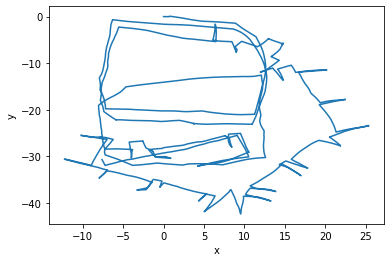

In [843]:
#affichage
x = liste_poses_1[:,0]
y = liste_poses_1[:,1]
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')

On remarque que l'on parvient bien à une image qui ressemble vaguement aux bureaux d'Intel, mais qui manque de précision. Il va donc nous falloir corriger cela grâce aux données de bouclage et à l'utilisation d'algorithmes d'optimisation.

In [844]:
def construire_p_i(z,i):
    n = len(z)//3
    return np.array([z[i-1], z[i+n-1], z[i+2*n-1]])

In [845]:
def gradient_k(z,i,j, delta_i_j):
    p_i = construire_p_i(z,i)
    
    p_j = construire_p_i(z,j)
    R_j = construire_Ri(p_j)
   
    res = 2*p_i - 2*np.dot(R_j, delta_i_j) - 2*p_j
    return res
    

    


In [846]:
def gradient_l(z,i,j, delta_i_j):
    p_i = construire_p_i(z,i)
    p_j = construire_p_i(z,j)
    R_i = construire_Ri(p_i) 
   
    R_i_point = construire_Ri_point(p_i) 
    res  =  2*p_i + 2*np.dot(R_i, delta_i_j) - 2*p_j

    

    d_dteta = 2* p_i[2] + (-p_i + np.dot(R_i, delta_i_j))[2]
    d_dteta += 2 * (np.dot(p_i, np.dot(R_i_point, delta_i_j)) )
    res[2] = d_dteta
    return res


    

    


In [847]:
def gradient_f(z, E):
    n = len(z)//3
    res = np.zeros(3*n)
    #cas i=0:
    delta_i_j = E[0][2]
    d_di =  gradient_l(z, 1, 0, delta_i_j) 
    for (i,j, delta_i_j) in E:
            d_di = gradient_k(z, i, j, delta_i_j)  
            res[i-1] += d_di[0]
            res[i+n-1] += d_di[1]
            res[i+2*n-1] += d_di[2]

            d_dj = gradient_l(z, i, j, delta_i_j)  
            res[j-1] += d_dj[0]
            res[j+n-1] += d_dj[1]
            res[j+2*n-1] += d_dj[2]

    for i in range (1,n-2):
        delta_i_j = E[i][2]
        d_di = gradient_k(z, i, i-1, delta_i_j) + gradient_l(z, i+1, i, delta_i_j) 
        res[i-1] = d_di[0]
        res[i+n-1] = d_di[1]
        res[i+2*n-1] = d_di[2]
    #cas i = n-1
    delta_i_j = E[n-1][2]
    d_di = gradient_k(z, n, n-1, delta_i_j) 

    
    return res

        
       
        

    

In [848]:
def gradient_c(z):
    n = len(z) // 3
    l = []
    for i in range(n-1):
        grad_c_i = np.zeros(3*n)
        grad_c_i[2*n + i] = 1
        l.append(grad_c_i)
        l.append(-grad_c_i)
    return np.transpose(np.array(l))


In [849]:
def projection_R_plus(vecteur):
    return [max(u,0) for u in vecteur]

In [850]:
def c(z):
    n = len(z) // 3
    l = np.zeros(2*n-2)
    for i in range(n):
        l[i] = z[2*n+i]* (-1)**(i% 2)- np.pi/2
    return l

In [867]:
def Arrow(z0, liste_delta_pi_odo, dico_delta_pi_boucle, seuil= 0.5, epsilon = 0.05,  pasmax = 20, alpha = 0.05):
    n = len(liste_delta_pi_odo)
    l = np.array([0.5 for i in range (3*n)])
    grad = seuil +1
    z = z0
    _lambda = np.zeros(2*n)
    nombrepas = 0
    E = construire_E(liste_delta_pi_odo, dico_delta_pi_boucle)

    while np.linalg.norm(grad)> seuil and nombrepas < pasmax:
        temp =  np.dot(gradient_c(z), _lambda)
        grad = gradient_f(z, E)
        z = z -epsilon * (grad + temp   )
        _lambda = projection_R_plus(_lambda + alpha * c(z))
        nombrepas +=1
        print(nombrepas)
    return z     

        



In [868]:
z0 = h(liste_poses_1)
print(z0[5])
z0 = np.transpose(z0)
print(z0.shape)
listes_poses_2 = Arrow(z0, liste_delta_pi_odo, dico_delta_pi_boucle, 0.1)

0.6960161188160643
(3684,)
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [869]:
def h(liste_pi):#la fonction h définie dans la première partie qui permet le passage entre R(3n) et (R(3))(n)
    n = len(liste_pi)
    z = np.zeros(3*n)
    for i in range (n):
        z[i] = liste_pi[i][0]
        z[n+i] = liste_pi[i][1]
        z[2*n+i] = liste_pi[i][2]
    return z



In [854]:
def h_inverse(z):#l'inverse de h
    n = len(z)//3
    liste_pi = []
    for i in range(n):
        p_i = construire_p_i(z, i)
        liste_pi.append(p_i)
    return np.array(liste_pi)

Text(0.5, 1.0, "algo d'Arrow")

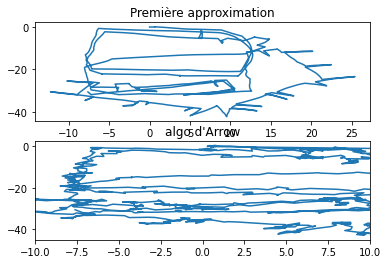

In [855]:
#affichage
fig, axes = plt.subplots(2)
listes_poses_2 = h_inverse(listes_poses_2)
x1 = liste_poses_1[:,0]
y1 = liste_poses_1[:,1]
x2 = listes_poses_2[:,0]
y2 = listes_poses_2[:,1]
plt.xlim(-10,10)
axes[0].plot(x1,y1)
axes[1].plot(x2,y2)
axes[0].set_title("Première approximation")
axes[1].set_title("algo d'Arrow")

Il y a manifestement une erreur dans le programme, mais nous n'avons pas réussi à la déceler.

## Nouvelle méthode:
On va essayer d'utiliser Gauss Newton, en oubliant les contraintes qui à se ramener après à des angles dans $[-\pi/2, \pi/2]$:
on  a :
$$ f = \sum_{i,j} {r_{i,j}^2}$$
, où:
$$r_{i,j} = \left\| p_i - R_j\Delta_{i,j}p- p_j \right\|$$
D'après les fonctions usuelles, de par un travail semblable à ce qui a été fait précédemment, on vérifie que $r_{i,j}$ est différentiable partout sauf en 0 et que:
$$\frac {\partial r_{i,j}}{\partial x_i} = x_i - R_j\Delta_{i,j}p- p_j \cdot e_1$$
$$\frac {\partial r_{i,j}}{\partial y_i} = y_i - R_j\Delta_{i,j}p- p_j \cdot e_2$$
$$\frac {\partial r_{i,j}}{\partial \theta_i} = \theta_i - R_j\Delta_{i,j}p- p_j\cdot e_3$$
et en notant $B_{i,k}$ la k-ième colonne de B, et en utilisant la règle pour la différentielle d'une composée:

$$\frac {\partial r_{i,j}}{\partial x_j} =-x_j - R_j\Delta_{i,j}p+ p_i \cdot e_1$$
$$\frac {\partial r_{i,j}}{\partial y_j} =- y_j  - R_j\Delta_{i,j}p+ p_i \cdot e_2$$
et enfin, en utilisant la règle de la chaîne:
$$\frac {\partial r_{i,j}}{\partial \theta_j} = (p_i - R_j\Delta_{i,j}p- p_j) \cdot (\dot R_j\Delta_{i,j}p + ( 0 0 1)^t)$$


In [856]:
def gradient_r(z,i,j, delta_i_j):
    n = len(z)
    res = np.zeros(n)
    p_i = construire_p_i(z,i)
    
    p_j = construire_p_i(z,j)
    
    R_j = construire_Ri(p_j) 
   
    alpha = np.array([0,0,1])
    R_j_point = construire_Ri_point(p_j) 
    value = p_i - np.dot(R_j, delta_i_j) - p_j

    d_dxi = value[0]
    d_dyi = value[1]
    d_dthetai =value[2]

    d_dxj = d_dxi
    d_dyj = d_dyi
    temp = np.dot(R_j_point,delta_i_j) - alpha
    d_dthetaj = np.dot(value, temp ) 
    
    res[i-1] = d_dxi
    res[j-1] = d_dxj
    res[(n//3)+ i-1]= d_dyi
    res[(n//3)+j-1]  = d_dyj
    res[2*(n//3) +i-1] = d_dthetai
    res[2*(n//3) +j-1] = d_dthetaj
    return res


    







    

In [857]:
def construire_J(z, E):
    lignes = []
    for (i,j, delta_i_j) in E:
        grad = gradient_r(z, i, j, delta_i_j)
        lignes.append(grad)
    lignes = np.array(lignes)
    return  lignes, np.transpose(lignes)
    
    


In [858]:
def construire_E(liste_delta_pi_odo,  dico_boucle):#E est la liste des (i,j delta_i_j) qui apparaissent dans les sommes de f
    E = []
    n = len(liste_delta_pi_odo)
    
    for i in range (1,n):
        E.append((i,i-1, liste_delta_pi_odo[i-1]))
    for string in dico_delta_pi_boucle.keys():
        string = string.split('->')
        i = string[0]
        j = string[1]
        E.append( (int(i),int(j), dico_boucle[i+ '->'+ j]) )
    return E



In [859]:
def r_ij(z, i, j):
    p_i = construire_p_i(z, i)
    p_j = construire_p_i(z, j)
    B_j = construire_Ri(p_j) + np.identity(3)
    res = np.linalg.norm(p_i - np.dot(B_j, p_j))
    return  res

In [860]:
def r(z, E):
    res = np.zeros(len(E))
    compteur = 0
    for (i,j) in E:
        res[compteur] = r_ij(z, i, j)
        compteur +=1
    return res

In [861]:
def Gauss_Newton(z0, liste_delta_pi_odo, dico_delta_pi_boucle,  seuil= 0.5, epsilon = 0.001,  pasmax = 100):
    erreur = seuil +1 
    n = len(liste_delta_pi_odo)
    print(n)
    l = np.array([0.5 for i in range (3*n)])
    z =l
    _lambda = np.zeros(2*n)
    nombrepas = 0
    E = construire_E(liste_delta_pi_odo,dico_delta_pi_boucle)
    r_value = np.zeros(len(E))
    while erreur > seuil and nombrepas < pasmax:
        J, J_t = construire_J(z, E)
        B = np.matmul(J_t, J)
        B_inverse = np.linalg.inv(B)
        r_value = r(z, E)
        temp = np.dot(J_t, r_value )
        print(nombrepas)
        nombrepas +=1
        
        z = z - np.dot(B_inverse,temp )
    return z
        



In [862]:
z0 = h(liste_poses) #on initialise le programme à la première approximation que l'on avait faite
Gauss_Newton(z0, liste_delta_pi_odo, dico_delta_pi_boucle, 0.1)

1227


LinAlgError: Singular matrix

On tombe sur une matrice non inversible, il y a une erreur